In [1]:
import re
import numpy as np
import pandas as pd
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
####Preprocessing####

In [4]:
q=pd.read_csv('Questions.csv', encoding='latin-1')
at=pd.read_csv('tagappendforquestion.csv', encoding='latin-1')
qat=pd.concat([q, at], axis=1)
qat10 = qat[qat.sumtag != 0]

In [5]:
# function of text cleaning
def clean_text(text):
    #erasing code syntax
    text = re.sub('<pre>.*?</pre>', '', text, flags=re.DOTALL)
    text = re.sub('<[^>]+>', '', text, flags=re.DOTALL)
    #eliminate duplicate spaces
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    #lower case
    text = text.lower()
    #replacing abbreviation for stopword removing
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    return text

In [6]:
qat10['CleanedText'] = qat10['Body'].apply(clean_text)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
#Separate the dataset into training and testing set into 0.8/0.2.
train, test = train_test_split(qat10, random_state=1, test_size=0.2, shuffle=True)

In [8]:
X_train = train.CleanedText
X_test = test.CleanedText
#set stop_words from nltk
stop_words = set(stopwords.words('english'))
categories=['javascript','java','c#','php','android','jquery','pyhton','html','c++','ios']
print(X_train.shape)
print(X_test.shape)

(565068,)
(141268,)


In [9]:
###pipeline for Vectorizer, TF-IDF, OnevsRest Classifier

In [10]:
#Naive Bayes Classifier
NaiveBayes = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))),
                #('clf', OneVsRestClassifier(MultinomialNB())),
            ])

In [11]:
#Linear Support Vector Classifier
LinearSupportVector = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
                #('clf', OneVsRestClassifier(LinearSVC())),
            ])

In [12]:
#Logistic Regression Classifier
LogisticRegression = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
                #('clf', OneVsRestClassifier(LogisticRegression(solver='sag'))),
            ])

In [13]:
####Classification results####

In [14]:
#Naive Bayes Classifier
NBpred=[0]*10
i=0
print('Naive Bayes Classifier : ')
for category in categories:
    print('Training for {}'.format(category))
    NaiveBayes.fit(X_train, train[category])
    print('Predicting for {}'.format(category))
    prediction = NaiveBayes.predict(X_test)
    NBpred[i]=accuracy_score(test[category], prediction)
    i=i+1
    print('Prediction accuracy : {}'.format(accuracy_score(test[category], prediction)))

Naive Bayes Classifier : 
Training for javascript
Predicting for javascript
Prediction accuracy : 0.8291969872865759
Training for java
Predicting for java
Prediction accuracy : 0.8547654104255741
Training for c#
Predicting for c#
Prediction accuracy : 0.8661338732055384
Training for php
Predicting for php
Prediction accuracy : 0.866381629243707
Training for android
Predicting for android
Prediction accuracy : 0.8963247161423678
Training for jquery
Predicting for jquery
Prediction accuracy : 0.8899326103576182
Training for pyhton
Predicting for pyhton
Prediction accuracy : 0.9138516861568083
Training for html
Predicting for html
Prediction accuracy : 0.9171857745561628
Training for c++
Predicting for c++
Prediction accuracy : 0.9336296967466092
Training for ios
Predicting for ios
Prediction accuracy : 0.9385494237902426


In [15]:
#Linear Support Vector Classifier
SVCpred=[0]*10
i=0
print('Linear Support Vector Classifier : ')
for category in categories:
    print('Training for {}'.format(category))
    LinearSupportVector.fit(X_train, train[category])
    print('Predicting for {}'.format(category))
    prediction = LinearSupportVector.predict(X_test)
    SVCpred[i]=accuracy_score(test[category], prediction)
    i=i+1
    print('Prediction accuracy : {}'.format(accuracy_score(test[category], prediction)))

Linear Support Vector Classifier : 
Training for javascript
Predicting for javascript
Prediction accuracy : 0.9051023586374833
Training for java
Predicting for java
Prediction accuracy : 0.9263598267123482
Training for c#
Predicting for c#
Prediction accuracy : 0.9364682730696265
Training for php
Predicting for php
Prediction accuracy : 0.952544100574794
Training for android
Predicting for android
Prediction accuracy : 0.9715930005379846
Training for jquery
Predicting for jquery
Prediction accuracy : 0.9419967720927599
Training for pyhton
Predicting for pyhton
Prediction accuracy : 0.9722937961888043
Training for html
Predicting for html
Prediction accuracy : 0.9373318798312428
Training for c++
Predicting for c++
Prediction accuracy : 0.9691366763881417
Training for ios
Predicting for ios
Prediction accuracy : 0.9828623609026814


In [16]:
#Logistic Regression Classifier
LRpred=[0]*10
i=0
print('Logistic Regression Classifier : ')
for category in categories:
    print('Training for {}'.format(category))
    LogisticRegression.fit(X_train, train[category])
    print('Predicting for {}'.format(category))
    prediction = LogisticRegression.predict(X_test)
    LRpred[i]=accuracy_score(test[category], prediction)
    i=i+1
    print('Prediction accuracy : {}'.format(accuracy_score(test[category], prediction)))

Logistic Regression Classifier : 
Training for javascript
Predicting for javascript
Prediction accuracy : 0.9041042557408614
Training for java
Predicting for java
Prediction accuracy : 0.9234504629498542
Training for c#
Predicting for c#
Prediction accuracy : 0.9307344904720106
Training for php
Predicting for php
Prediction accuracy : 0.9507319421241894
Training for android
Predicting for android
Prediction accuracy : 0.9676430614151825
Training for jquery
Predicting for jquery
Prediction accuracy : 0.941536653736161
Training for pyhton
Predicting for pyhton
Prediction accuracy : 0.9686907155194382
Training for html
Predicting for html
Prediction accuracy : 0.9370841237930742
Training for c++
Predicting for c++
Prediction accuracy : 0.9663901237364442
Training for ios
Predicting for ios
Prediction accuracy : 0.978466460911176


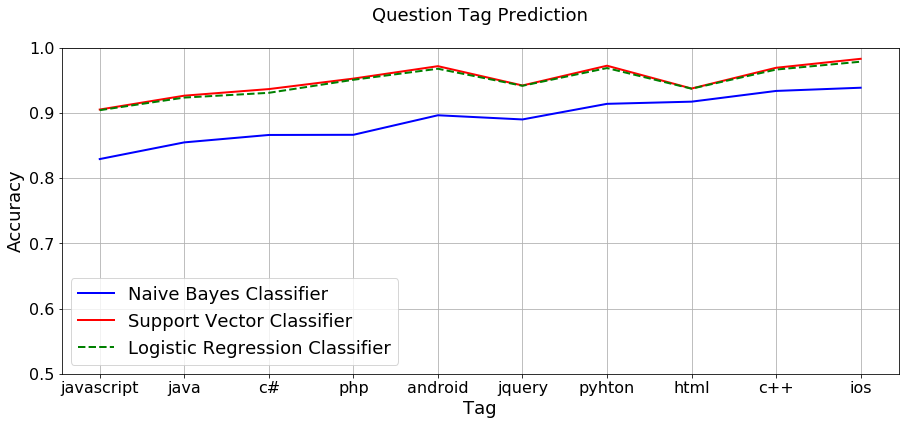

In [17]:
xx=['javascript','java','c#','php','android','jquery','pyhton','html','c++', 'ios']
df=pd.DataFrame({'x': xx, 'acc1': NBpred, 'acc2': SVCpred, 'acc3': LRpred})
# multiple line plot
plt.figure(num=None, figsize=(15, 6))
plt.plot( 'x', 'acc1', data=df, marker='', color='blue', linewidth=2, label="Naive Bayes Classifier")
plt.plot( 'x', 'acc2', data=df, marker='', color='red', linewidth=2, label="Support Vector Classifier")
plt.plot( 'x', 'acc3', data=df, marker='', color='green', linewidth=2, linestyle='dashed', label="Logistic Regression Classifier")
plt.grid()
plt.legend(fontsize=18)
plt.ylim((0.5,1))
plt.title("Question Tag Prediction\n", fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.xlabel('Tag', fontsize=18)
plt.tick_params(labelsize=16)